In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing

In [2]:
data = pd.read_csv("hotel_bookings.csv")

In [3]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [4]:
num_rows, num_columns = data.shape
print("Total number of records:", num_rows)
print("Total number of columns:", num_columns)

Total number of records: 119390
Total number of columns: 32


In [5]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
data.shape

(119390, 32)

In [8]:
unique_values = data['previous_cancellations'].unique()
print("Unique values in 'adults' field:", unique_values)

Unique values in 'adults' field: [ 0  1  2  3 26 25 14  4 24 19  5 21  6 13 11]


In [9]:
duplicates = data.duplicated().sum()
print("The number of duplicates are as :", duplicates)

The number of duplicates are as : 31994


### Removing duplicates

In [10]:
data.drop_duplicates(inplace=True)

### Checking nulls 

In [11]:
data.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


### Joining two features together

In [12]:
data['children_and_babies'] = data['children'] + data['babies']
data['children_and_babies'] = data['children_and_babies'].fillna(0)

In [13]:
data = data.drop(['children'], axis = 1)

In [14]:
data = data.drop(['babies'], axis = 1)

### Handling nulls 

In [15]:
data['country'] = data['country'].fillna('other')

In [16]:
data.drop(columns=['agent'], inplace=True)

In [17]:
data.drop(columns=['company'], inplace=True)

In [18]:
data['arrival_date_month'] = data['arrival_date_month'].map({'January' : 1,
        'February' : 2,
        'March' : 3,
        'April' : 4,
        'May' : 5,
        'June' : 6,
        'July' : 7,
        'August' : 8,
        'September' : 9,
        'October' : 10,
        'November' : 11,
        'December' : 12})

In [19]:
data = data.drop(['reservation_status_date'], axis = 1)
data = data.drop(['reservation_status'], axis = 1)

In [20]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list                int64
customer_type                      object
adr                               

### Label Encoding

In [21]:
label_encoder = preprocessing.LabelEncoder()

data['reserved_room_type'] = label_encoder.fit_transform(data['reserved_room_type'])
data['assigned_room_type'] = label_encoder.fit_transform(data['assigned_room_type'])

data['customer_type'] = label_encoder.fit_transform(data['customer_type'])
data['deposit_type'] = label_encoder.fit_transform(data['deposit_type'])

data['country'] = label_encoder.fit_transform(data['country'])

data['meal'] = label_encoder.fit_transform(data['meal'])
data['market_segment'] = label_encoder.fit_transform(data['market_segment'])
data['distribution_channel'] = label_encoder.fit_transform(data['distribution_channel'])

In [22]:
one_hot_hotel = pd.get_dummies(data['hotel'])

data = pd.concat([data, one_hot_hotel], axis=1)
data.rename(columns={'0': 'Resort Hotel', '1': 'City Hotel'}, inplace=True)
data = data.drop(['hotel'], axis = 1)

In [23]:
data.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,children_and_babies,City Hotel,Resort Hotel
0,0,342,2015,7,27,1,0,0,2,0,...,3,0,0,2,0.0,0,0,0.0,0,1
1,0,737,2015,7,27,1,0,0,2,0,...,4,0,0,2,0.0,0,0,0.0,0,1
2,0,7,2015,7,27,1,0,1,1,0,...,0,0,0,2,75.0,0,0,0.0,0,1
3,0,13,2015,7,27,1,0,1,1,0,...,0,0,0,2,75.0,0,0,0.0,0,1
4,0,14,2015,7,27,1,0,2,2,0,...,0,0,0,2,98.0,0,1,0.0,0,1


In [24]:
### Handling outliers

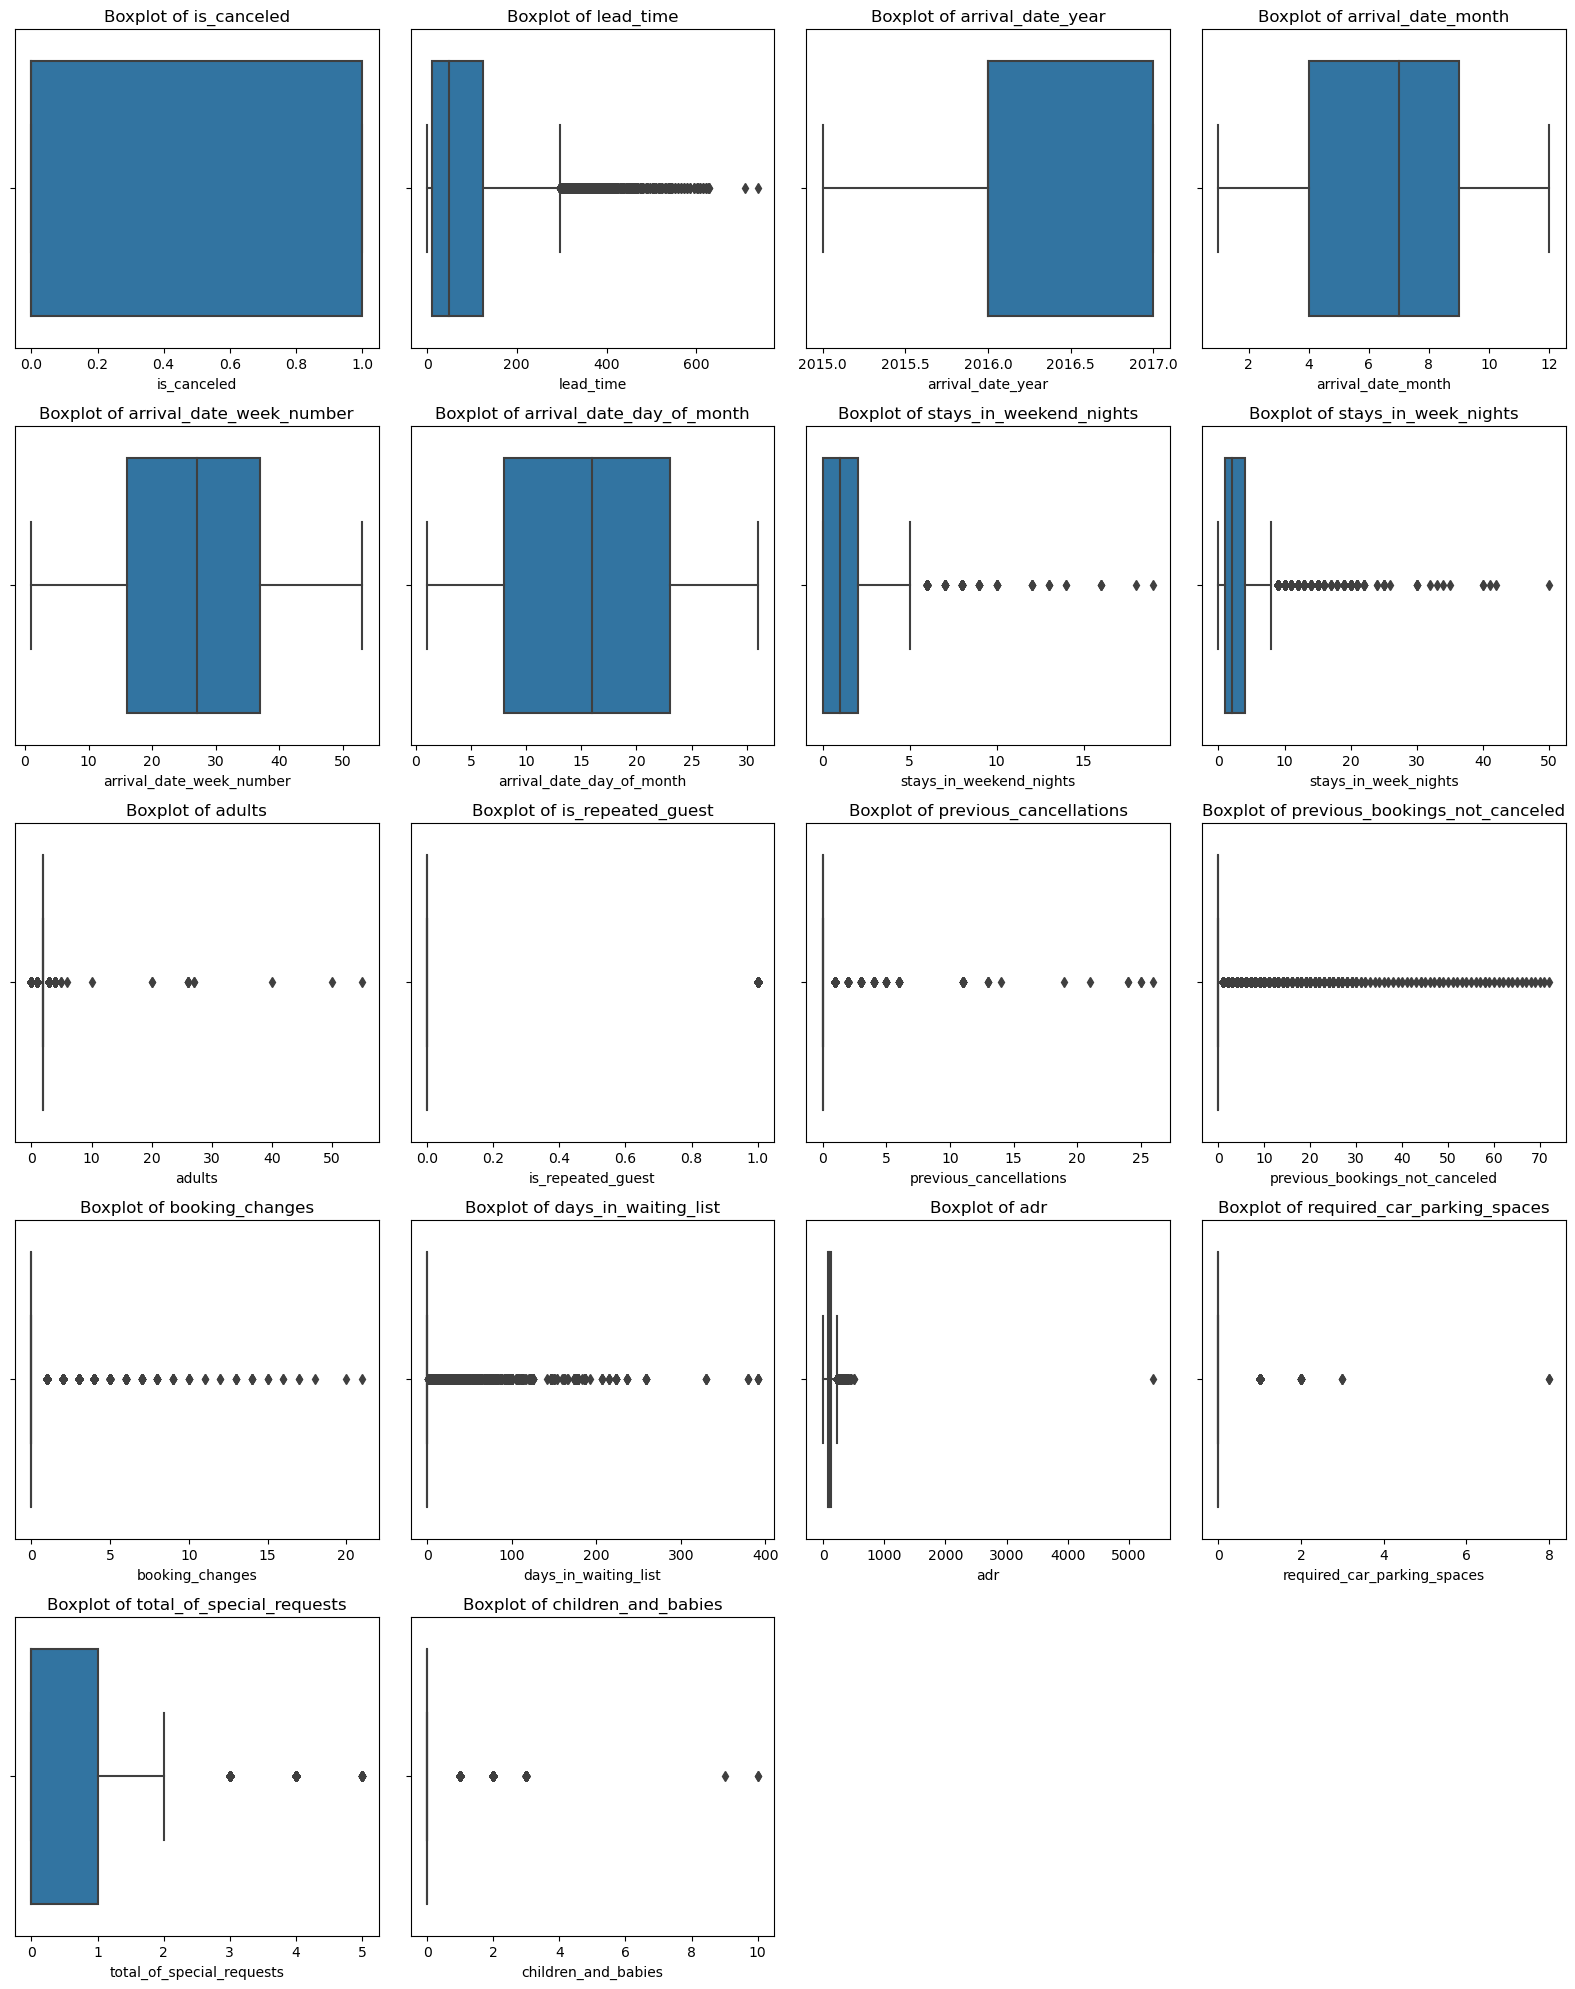

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
num_plots = len(numerical_cols)
num_cols = 4  
num_rows = (num_plots - 1) // num_cols + 1  

plt.figure(figsize=(16, 4 * num_rows))  
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [26]:
Q1 = data['adr'].quantile(0.25)
Q3 = data['adr'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['adr'] >= lower_bound) & (data['adr'] <= upper_bound)]

### Correlation Plot

<Axes: >

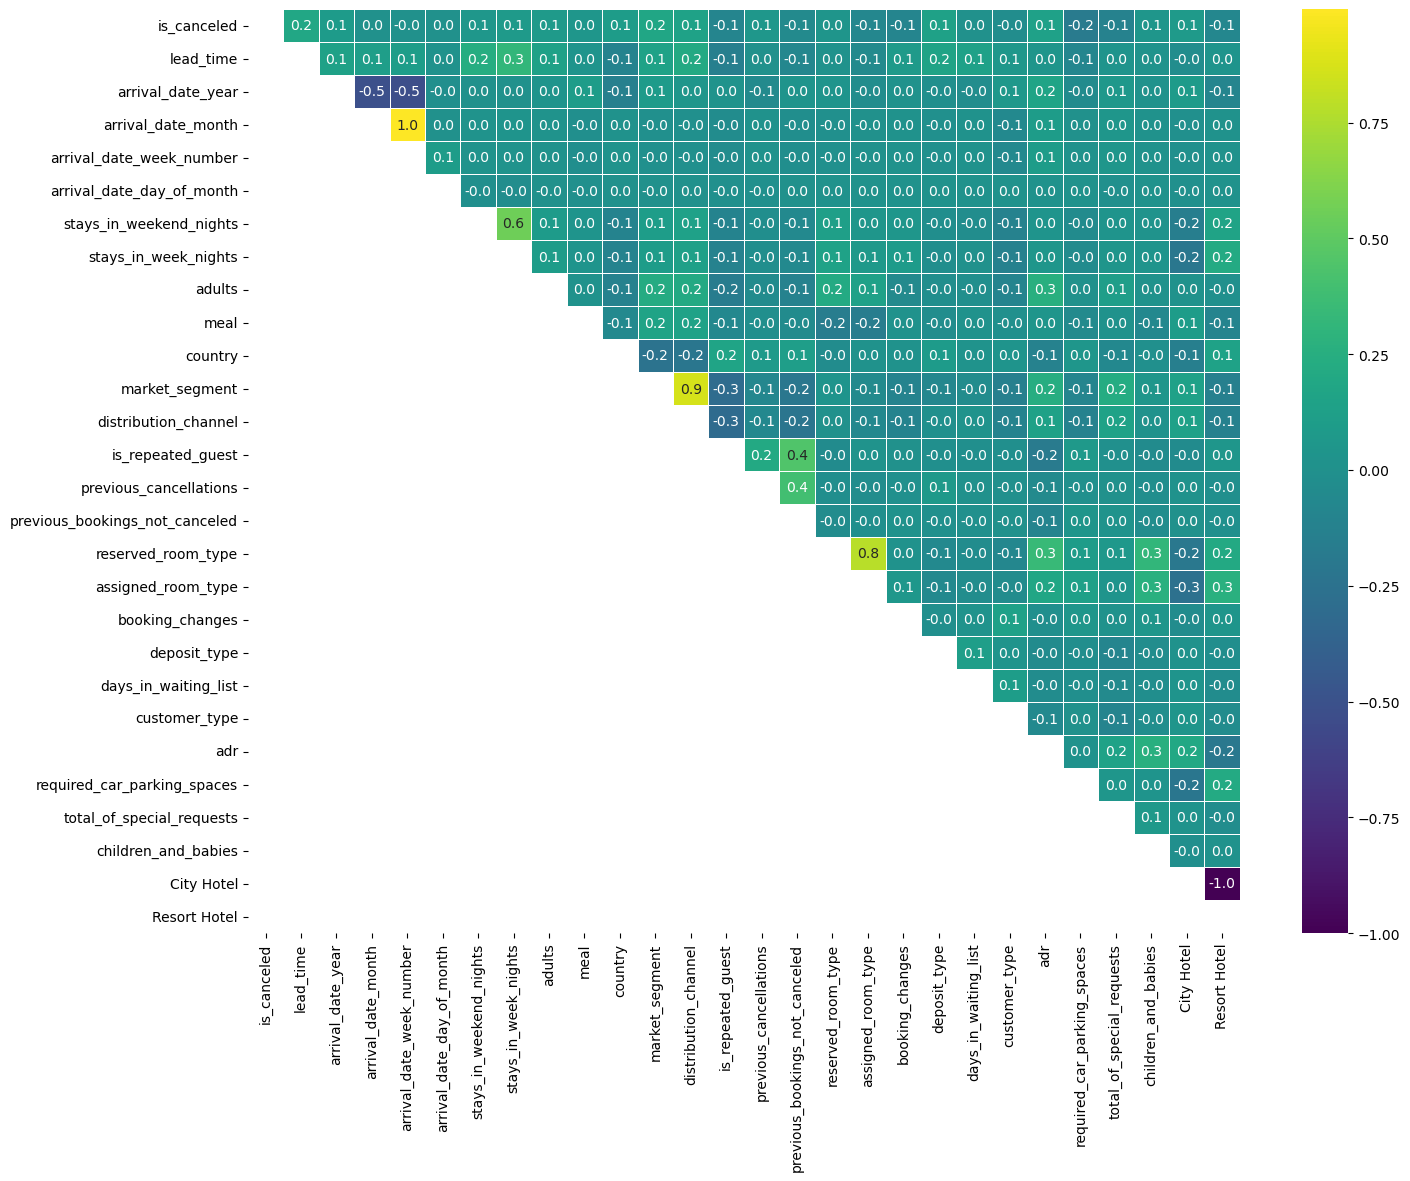

In [27]:
import numpy as np
plt.figure(facecolor='w', figsize = (16,12))
mask = np.tril(data.corr())
sns.heatmap(data.corr(), annot = True, fmt=".1f", linewidth = 0.5, mask = mask, cmap = 'viridis')

<Axes: >

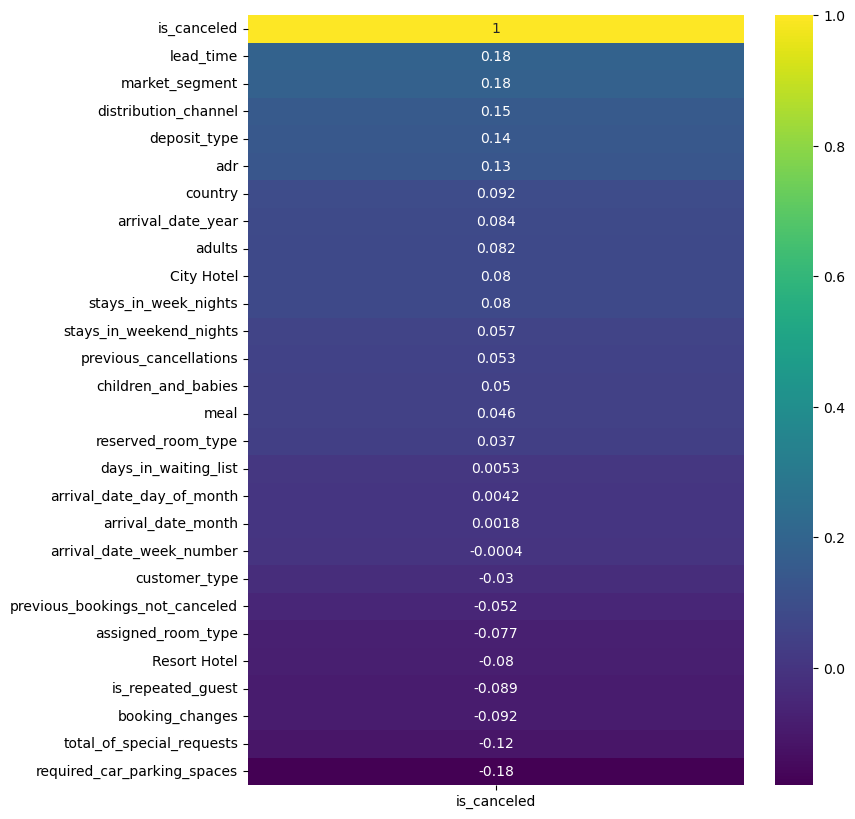

In [28]:
plt.figure(facecolor='w', figsize = (8,10))
correlation = data.corr().sort_values('is_canceled', ascending=False)[['is_canceled']]
sns.heatmap(correlation, cmap = "viridis", annot=True)

In [29]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,84906.0,0.271594,0.444784,0.00,0.0,0.0,1.0,1.0
lead_time,84906.0,80.136775,86.457750,0.00,11.0,49.0,125.0,737.0
arrival_date_year,84906.0,2016.199668,0.685898,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_month,84906.0,6.447389,3.129160,1.00,4.0,7.0,9.0,12.0
arrival_date_week_number,84906.0,26.719749,13.813354,1.00,15.0,27.0,37.0,53.0
arrival_date_day_of_month,84906.0,15.798377,8.842404,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,84906.0,1.001201,1.032616,0.00,0.0,1.0,2.0,19.0
stays_in_week_nights,84906.0,2.612878,2.057557,0.00,1.0,2.0,3.0,50.0
adults,84906.0,1.866641,0.627811,0.00,2.0,2.0,2.0,55.0
meal,84906.0,0.553259,1.083976,0.00,0.0,0.0,0.0,4.0


### Performing under sampling to balance the class

In [30]:
is_canceled_counts = data['is_canceled'].value_counts()
print("Counts of canceled (1) and not-canceled (0) bookings:")
print(is_canceled_counts)

Counts of canceled (1) and not-canceled (0) bookings:
0    61846
1    23060
Name: is_canceled, dtype: int64


In [31]:
canceled_bookings = data[data['is_canceled'] == 1]
not_canceled_bookings = data[data['is_canceled'] == 0]

minority_class_count = len(canceled_bookings)

undersampled_not_canceled = not_canceled_bookings.sample(n=minority_class_count, random_state=42)

undersampled_data = pd.concat([undersampled_not_canceled, canceled_bookings])


undersampled_data = undersampled_data.sample(frac=1, random_state=42).reset_index(drop=True)

print(undersampled_data['is_canceled'].value_counts())

0    23060
1    23060
Name: is_canceled, dtype: int64


In [32]:
undersampled_data.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,children_and_babies,City Hotel,Resort Hotel
0,0,23,2016,4,16,10,2,3,2,0,...,0,0,0,2,125.20,0,1,0.0,1,0
1,0,65,2017,7,28,15,0,1,1,0,...,0,0,0,3,126.00,0,1,0.0,1,0
2,0,60,2017,2,6,11,2,3,2,0,...,2,0,0,2,97.28,0,1,0.0,1,0
3,0,83,2016,7,31,25,3,5,2,0,...,0,0,0,3,153.00,1,0,0.0,0,1
4,1,173,2016,8,32,2,0,2,2,0,...,0,0,0,2,105.30,0,0,0.0,1,0


In [33]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = [ "stays_in_weekend_nights", "stays_in_week_nights", "adults", "adr", 
                    "required_car_parking_spaces", "total_of_special_requests", "children_and_babies"]

scaler = StandardScaler()

undersampled_data[columns_to_scale] = scaler.fit_transform(undersampled_data[columns_to_scale])

In [34]:
undersampled_data.head(4).transpose()

,0,1,2,3
is_canceled,0.000000,0.000000,0.000000,0.000000
lead_time,23.000000,65.000000,60.000000,83.000000
arrival_date_year,2016.000000,2017.000000,2017.000000,2016.000000
arrival_date_month,4.000000,7.000000,2.000000,7.000000
arrival_date_week_number,16.000000,28.000000,6.000000,31.000000
arrival_date_day_of_month,10.000000,15.000000,11.000000,25.000000
stays_in_weekend_nights,0.926253,-0.989516,0.926253,1.884137
stays_in_week_nights,0.143351,-0.813290,0.143351,1.099992
adults,0.150789,-1.263854,0.150789,0.150789
meal,0.000000,0.000000,0.000000,0.000000


### Model one using pyOD KNN

### Improving the model by removing feature with almost zero correlation values

In [35]:
X = undersampled_data.drop(columns=['is_canceled','total_of_special_requests','assigned_room_type','arrival_date_month','arrival_date_week_number','days_in_waiting_list','previous_bookings_not_canceled'])
y = undersampled_data['is_canceled']

In [36]:
from pyod.models.knn import KNN
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

knn_classifier = KNN(contamination=0.1) 
knn_classifier.fit(X_train, y_train)
y_pred_pyod = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_pyod)
print("Accuracy (PyOD):", accuracy)

report_pyod = classification_report(y_test, y_pred_pyod)
print("Classification Report (PyOD):\n", report_pyod)

C:\Users\ramsh\AppData\Roaming\Python\Python311\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Accuracy (PyOD): 0.5065770453888407
Classification Report (PyOD):
               precision    recall  f1-score   support

           0       0.51      0.91      0.65      6968
           1       0.52      0.10      0.17      6868

    accuracy                           0.51     13836
   macro avg       0.51      0.50      0.41     13836
weighted avg       0.51      0.51      0.41     13836



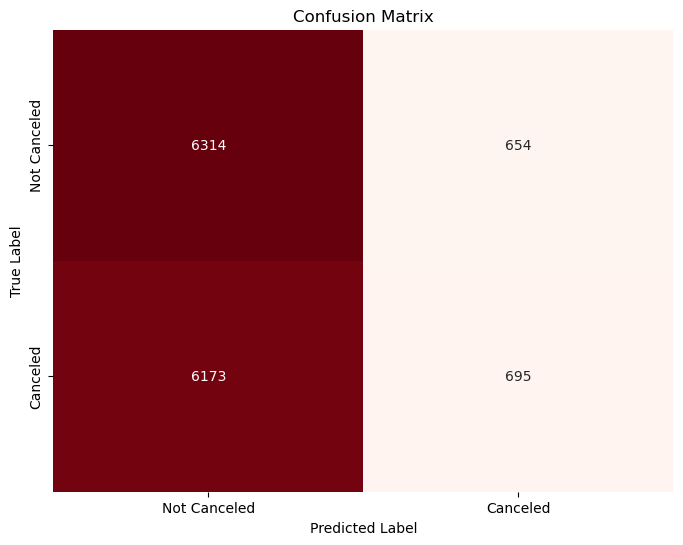

In [37]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_pyod)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False, 
            xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Model 2 sklearn KNeighborsClassifier

### Improving the model by removing feature with almost zero correlation values

In [38]:
X = undersampled_data.drop(columns=['is_canceled','country','assigned_room_type','arrival_date_month','arrival_date_week_number','days_in_waiting_list','previous_bookings_not_canceled'])
y = undersampled_data['is_canceled']

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=11) 
knn_classifier.fit(X_train_scaled, y_train)
y_pred = knn_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report_sklearn = classification_report(y_test, y_pred)
print("Classification Report (scikit-learn):\n", report_sklearn)

Accuracy: 0.7049725354148598
Classification Report (scikit-learn):
               precision    recall  f1-score   support

           0       0.72      0.67      0.70      6968
           1       0.69      0.74      0.71      6868

    accuracy                           0.70     13836
   macro avg       0.71      0.71      0.70     13836
weighted avg       0.71      0.70      0.70     13836



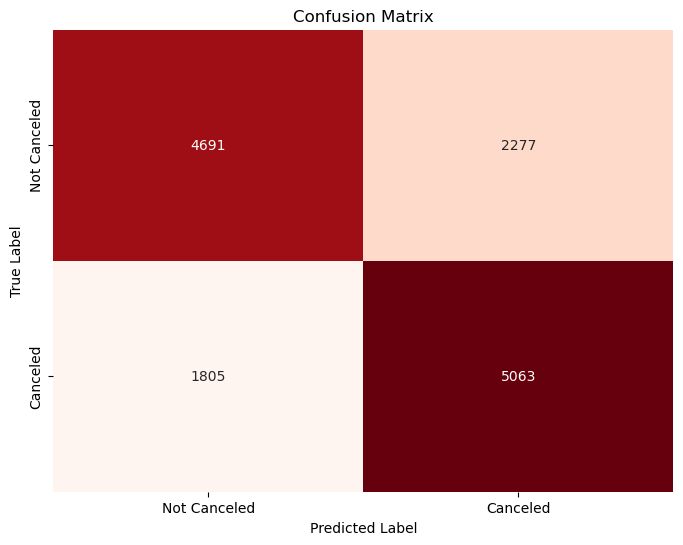

In [40]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False, 
            xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Random Forest by sklearn

### Improving the model by removing feature with almost zero correlation values

In [41]:
X = undersampled_data.drop(columns=['is_canceled','distribution_channel','deposit_type', 'previous_bookings_not_canceled'])
y = undersampled_data['is_canceled']

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_classifier_sklearn = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_sklearn.fit(X_train, y_train)

y_pred_sklearn = rf_classifier_sklearn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_sklearn)

print("Accuracy:", accuracy)

report_sklearn = classification_report(y_test, y_pred_sklearn)

print("Classification Report (scikit-learn Random Forest):\n", report_sklearn)

Accuracy: 0.8145417750795028
Classification Report (scikit-learn Random Forest):
               precision    recall  f1-score   support

           0       0.83      0.79      0.81      6968
           1       0.80      0.83      0.82      6868

    accuracy                           0.81     13836
   macro avg       0.82      0.81      0.81     13836
weighted avg       0.82      0.81      0.81     13836



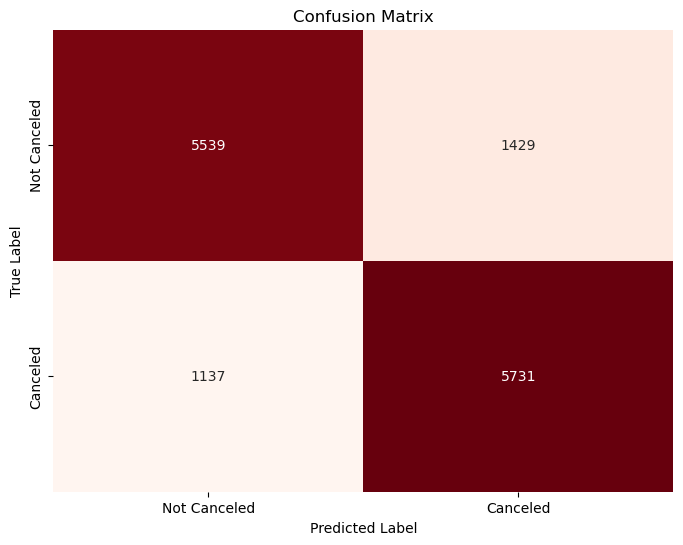

In [43]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_sklearn)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False, 
            xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Random Forest by XGBOOST 

In [44]:
import xgboost as xgb  # Import XGBoost library
X = undersampled_data.drop(columns=['is_canceled'])

y = undersampled_data['is_canceled']
X = undersampled_data.drop(columns=['is_canceled','distribution_channel','deposit_type', 'previous_bookings_not_canceled'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_classifier_xgb = xgb.XGBRFClassifier(n_estimators=100, random_state=42)
rf_classifier_xgb.fit(X_train, y_train)

y_pred_xgb = rf_classifier_xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_xgb)

print("Accuracy:", accuracy)

report_xgb = classification_report(y_test, y_pred_xgb)

print("Classification Report (XGBoost Random Forest):\n", report_xgb)

Accuracy: 0.7536137612026598
Classification Report (XGBoost Random Forest):
               precision    recall  f1-score   support

           0       0.86      0.61      0.71      6968
           1       0.70      0.90      0.78      6868

    accuracy                           0.75     13836
   macro avg       0.78      0.75      0.75     13836
weighted avg       0.78      0.75      0.75     13836



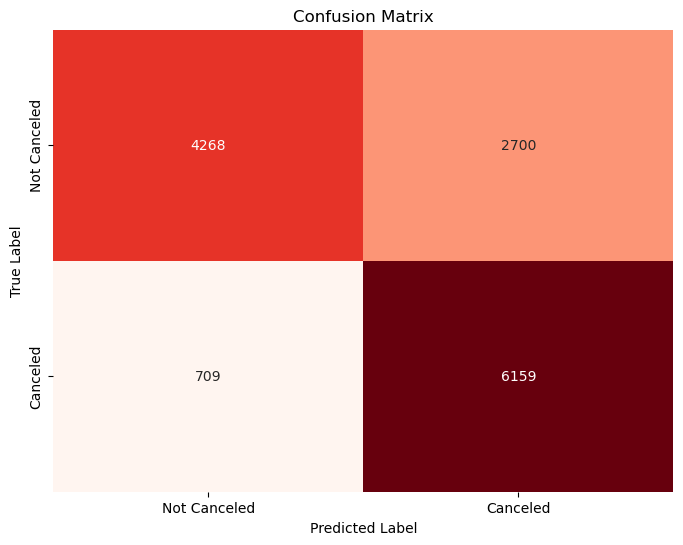

In [45]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False, 
            xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()